## Desarollos guía y test: Particula en una caja 1D

In [1]:
import qcelemental as qcel
import numpy as np
from sympy import *
from scipy import integrate as integracion_num

c = qcel.constants.c
h = qcel.constants.h
me= qcel.constants.me
pi = np.pi
avog = qcel.constants.get("Avogadro constant")
J2kJmol = avog/1000


## Definición de energía y función de onda.
def E(n,l,m):
    return (n**2 * h**2 / (8 * m * l**2))

#### Pregunta 3 Test 

Calcule la separación de energía entre el estado n=4 y n=5 para un electrón en una caja de largo 1nm. Exprese su resultado en KJ/mol. La separación de energía corresponde a:

\begin{align}
    \Delta E &= \frac{n_2^2h^2}{8ml^2} - \frac{n_1^2h^2}{8ml^2}  \\
             &= (n_2^2 - n_1^2)\frac{h^2}{8ml^2}
\end{align}

In [2]:
def deltaE(n1,n2,l):
    return (n2**2 - n1**2)*(h**2)/(8*me*l**2)

l = 10**(-9)
n1 = 4
n2 = 5

dE = deltaE(4,5,l)*J2kJmol
print("La separacion entre los niveles de energía n=4 y n=5 es: {} kJ/mol".format(np.round(dE,1)))

La separacion entre los niveles de energía n=4 y n=5 es: 326.5 kJ/mol


#### Pregunta 11 Test

Calcule la energía de punto cero (estado fundamental) de un electrón en una caja 1D de largo 5nm.  Entregue el resultado de su calculo en las unidades  kJ/mol. 

In [3]:
l = 5*10**(-9)
p0 = E(1,l,me)*J2kJmol
print("La energía de punto cero es: {} kJ/mol".format(np.round(p0, 2)))

La energía de punto cero es: 1.45 kJ/mol


### Ejercicio 4

Calcule la probabilidad que una partícula en una caja 1-D, de largo l = 1.0 Å y en el estado
electrónico n = 4 se encuentre entre l/3 ≥ x ≥ l/2.

Solución:

para calcular la probabilidad es necesarion integrar la densidad de probabilidad:

\begin{equation}
P = \frac{2}{l}\int_{l/3}^{l/2} \sin^2\Big (\frac{n \pi x}{l}\Big)dx
\end{equation}

Entonces definamos la función de la densidad de probabilidad para integrarla:

In [4]:
init_printing(use_unicode=False, wrap_line=False)

x = Symbol('x', nonzero=True)
l, n, pi_s = symbols('l n pi', nonzero=True)

dprob = 2/l * (sin((n*pi_s*x)/l))**2

In [5]:
dprob

Despues integramos la densidad de probabilidad entre los límites $l/3 < x < l/2$.

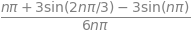

In [6]:
i = integrate(dprob, (x, l/3, l/2))
i.simplify()

Este es el resultado de la integral entre los límites de integración indicados para un estado de energía $n$ general. Ahora solamente falta evaluar la integral para el estado $n$ que pide el ejercicio.

In [7]:
#i.subs(n, 4)

In [8]:
g_eval = lambdify([n, pi_s], i)

In [9]:
p = g_eval(4,np.pi)
print("La probabilidad es: {}".format(np.round(p, 3)))

La probabilidad es: 0.201


### Ejercicio 5. 

Cuando una partícula de masa $9.1x10^{-28}g$ en una cierta caja 1D pasa del estado $n = 5$ al
estado $n = 2$ emite un fotón de frecuencia $6.0x10^{14} Hz$.
¿Cuál es el largo de la caja? (Exprese su resultado en $nm$)

**Solución:** En este caso conocemos la frequencia de la radiación y queremos calcular el largo de la caja. 

\begin{align}
\Delta E_n = h\nu = (n_1^2 - n_2^2)\frac{h^2}{8ml^2} \\
\nu = \frac{(n_2^2 - n_1^2)h}{8ml²}\\
l = \sqrt{\frac{(n_1^2 - n_2^2)h}{8m\nu}}\\
\end{align}

Esta equación la podemos escribir en código y evaluar. Recuerde que al tratarse de una emisión el $\Delta E_n$ 
está dado por la diferencia $(n_1^2 - n_2^2)$, y de esa forma se obtiene un valor positivo para la differencia de energía entre los distintos niveles. 

In [10]:
def l_fun(n1, n2,nu):
    return np.sqrt(((n1**2 - n2**2)*h)/(8*me*nu))


n1 = 5
n2 = 2
nu = 6.0e14
largo = l_fun(n1,n2,nu)
print("El largo de la caja es: {} nm".format(np.round(largo*10e9, 2)))

El largo de la caja es: 17.84 nm


### Ejercicio 6

Considere un electrón en una caja 1-D de largo 0.1nm. Encuentre la frecuencia y longitud de
onda de un fotón emitido cuando el electrón:

- pasa del estado n = 3 al n = 2
- pasa del estado n = 4 al n = 2

¿Que fotón tiene mayor longitud de onda?

**Solución**: Este ejercicio es similar al anterior, solo que conocemos el largo de la caja y nos piden la frecuencia y longitud de onda de emisión.

Frecuencia: 
\begin{align}
\Delta E_n = h\nu = (n_1^2 - n_2^2)\frac{h^2}{8ml^2} \\
\nu = \frac{(n_1^2 - n_2^2)h}{8ml²}\\
\end{align}

Longitud de onda:
\begin{align}
\Delta E_n = h\frac{c}{\lambda} = (n_1^2 - n_2^2)\frac{h^2}{8ml^2} \\
\frac{c}{\lambda} = \frac{(n_1^2 - n_2^2)h}{8ml²}\\
\lambda = \frac{8ml²c}{(n_1^2 - n_2^2)h}
\end{align}

Podemos implementar ambas ecuaciones:

In [11]:
def nu(n1,n2,l):
    return ((n1**2 -n2**2)*h)/(8*me*l**2)

def lam(n1,n2,l):
    return (8*me*l**2*c)/((n1**2 -n2**2)*h)

Ahora podemos calcular los resultado para las dos transiciones del ejecricio: 

In [12]:
# De  n=3 a n=2:
l=0.1*10e-9

n1 = 3
n2 = 2

frecu = nu(n1,n2,l)
long_onda = lam(n1,n2,l)

print("\nEmisión de n = {} a n = {}".format(n1,n2))
print("La frecuencia del fotón emitido es {} Hz".format(np.format_float_scientific(frecu, 2)))
print("La longitud de onda del fotón emitido es {} nm".format(np.round(long_onda*10e9, 2)))

n1 = 4
n2 = 2

frecu = nu(n1,n2,l)
long_onda = lam(n1,n2,l)

print("\nEmisión de n = {} a n = {}".format(n1,n2))
print("La frecuencia del fotón emitido es {} Hz".format(np.format_float_scientific(frecu, 2)))
print("La longitud de onda del fotón emitido es {} nm".format(np.round(long_onda*10e9, 2)))



Emisión de n = 3 a n = 2
La frecuencia del fotón emitido es 4.55e+14 Hz
La longitud de onda del fotón emitido es 6594.38 nm

Emisión de n = 4 a n = 2
La frecuencia del fotón emitido es 1.09e+15 Hz
La longitud de onda del fotón emitido es 2747.66 nm


Claramente el fotón de mayor energía corresponde al fotón emitido desde el nivel de energía más alto (n=4) que tiene una mayor frecuencia y menor longitud de onda.

### Ejercicio 7

La frecuencia de absorción de n = 1 a n = 2 para un electrón en una caja 1D es $6.0x10^{12}$ Hz.
Encuentre frecuencia de absorción de n = 2 a n = 3, para este sistema.

Finalmente este ejercicio es una combinación de los dos anteriores donde debemos primero encontrar el largo de 
la caja mediante la primera absorción y luego utilizar ese dato para calcular la frecuencia de adsorción:

$$
n_1 = 1, n_2 = 2, n_3 = 2, n_4 = 3
$$

\begin{align}
l = \sqrt{\frac{(n_2^2 - n_1^2)h}{8m\nu}}\\
\end{align}

\begin{align}
\nu = \frac{(n_4^2 - n_3^2)h}{8ml²}\\
\end{align}


In [13]:
n1 = 1
n2 = 2
nu_e = 6.0e12

largo = l_fun(n2,n1,nu_e)
print("El largo  de la caja es {} nm".format(np.round(largo*10e9, 2)))

El largo  de la caja es 67.43 nm


In [14]:
n3 = 2
n4 = 3

frecu = nu(n4,n3,largo)
print("La frecuencia del fotón emitido es {} Hz".format(np.format_float_scientific(frecu, 2)))

La frecuencia del fotón emitido es 1.e+13 Hz


### Ejercicio 8

Una partícula se encuentra en el estado fundamental de una caja 1D de 20nm. Calcule la
probabilidad que la partícula se encuentre entre los siguientes valores:




- x = 9.95 y 10.0 nm
- x = 2.95 y 3.05 nm
- x = 19.90 y 20.00 nm
- En la primera mitad derecha
- En el tercio del medio

Al estar en el estado fundamental, el electrón se encuentra en en estado de energía n=1. Debemos evaluar la 
la integral de densidades de probabilidad que ya derivamos en el ejercicio 4 para poder obtener los distintos valores de densidad de probabilida. 

\begin{equation}
P = \frac{2}{l}\int \sin^2\Big (\frac{n \pi x}{l}\Big)dx
\end{equation}

Podemos usar integración numérica para obtener la solución


In [15]:
def dP(x,n,l):
    return 2/l * (np.sin((n * np.pi * x)/l))**2

Esta es la expresión general que debemos evaluar entre los distintos límites de integración

In [16]:
n = 1
l = 20.0
l1 = 9.95
l2 = 10.0

prob1 = integracion_num.quad(dP, l1, l2, args= (n,l))[0]
print("La probabilidad de encontrar la partícula en el segmento entre {} y {} nm es: {}".format(l1, l2, np.round(prob1, 5)))


l1 = 2.95
l2 = 3.00

prob1 = integracion_num.quad(dP, l2 ,l2,  args=(n,l))[0]
print("La probabilidad de encontrar la partícula en el segmento entre {} y {} nm es: {}".format(l1, l2, np.round(prob1, 5)))


l1 = 19.90
l2 = 20.00

prob1 = integracion_num.quad(dP, l1, l2, args=(n,l))[0]
print("La probabilidad de encontrar la partícula en el segmento entre {} y {} nm es: {}".format(l1, l2, np.round(prob1, 5)))


l1 = 20.00*1/3
l2 = 20.00*2/3

prob1 = integracion_num.quad(dP, l1, l2, args=(n,l))[0]
print("La probabilidad de encontrar la partícula en el segmento entre {} y {} nm es: {}".format(np.round(l1,2), np.round(l2, 2), np.round(prob1, 5)))


l1 = 0.0
l2 = 10.0

prob1 = integracion_num.quad(dP, l1, l2, args= (n,l))[0]
print("La probabilidad de encontrar la partícula en el segmento entre {} y {} nm es: {}".format(l1, l2, np.round(prob1, 5)))

La probabilidad de encontrar la partícula en el segmento entre 9.95 y 10.0 nm es: 0.005
La probabilidad de encontrar la partícula en el segmento entre 2.95 y 3.0 nm es: 0.0
La probabilidad de encontrar la partícula en el segmento entre 19.9 y 20.0 nm es: 0.0
La probabilidad de encontrar la partícula en el segmento entre 6.67 y 13.33 nm es: 0.609
La probabilidad de encontrar la partícula en el segmento entre 0.0 y 10.0 nm es: 0.5


Como podemos ver, si el intervalo de integración es pequeño, la probabilidad de encontrar la partícula en ese intervalo es es muy pequeña también, aunque de todas formas es en el centro es más probable que en los extremos de la caja. Además en el tercio central existe un 60% de probabilidad de encontrar la partícula al hacer una observación.

### Ejercicio 9

Calcule la energía para los primeros tres estados de un electrón y de un protón en una caja de
longitud 5.00 nm y en una de 50.0 nm.

**Solución:**  Como la energía total es inversamente proporcional a la masa de las partículas, mientras mayor
la masa menor es la energía de los distintos estados:

In [17]:
m_electron = me
m_proton = qcel.constants.proton_mass

In [18]:
l1 = 5.00e-9
n1 = 1
n2 = 2
n3 = 3

Ee_n1_l1 = E(n1, l1, m_electron)*J2kJmol
Ep_n1_l1 = E(n1, l1, m_proton)*J2kJmol

print("Para l = 5.00 nm\n")
print("La energía del electrón en el estado {} y caja de largo {} m es {} kJ/mol".format(n1, l1, np.round(Ee_n1_l1,3)))
print("La energía del proton en el estado {} y caja de largo {} m es {} kJ/mol".format(n1, l1, np.round(Ep_n1_l1,3)))

Ee_n2_l1 = E(n2, l1, m_electron)*J2kJmol
Ep_n2_l1 = E(n2, l1, m_proton)*J2kJmol

print("\nLa energía del electrón en el estado {} y caja de largo {} m es {} kJ/mol".format(n2, l1, np.round(Ee_n2_l1,3)))
print("La energía del proton en el estado {} y caja de largo {} m es {} kJ/mol".format(n2, l1, np.round(Ep_n2_l1,3)))

Ee_n3_l1 = E(n3, l1, m_electron)*J2kJmol
Ep_n3_l1 = E(n3, l1, m_proton)*J2kJmol

print("\nLa energía del electrón en el estado {} y caja de largo {} m es {} kJ/mol".format(n3, l1, np.round(Ee_n3_l1,3)))
print("La energía del proton en el estado {} y caja de largo {} m es {} kJ/mol".format(n3, l1, np.round(Ep_n3_l1,3)))

print("---------------------------------------------")
print("Para l = 50.00 nm\n")
l1 = 50.00e-9
Ee_n1_l1 = E(n1, l1, m_electron)*J2kJmol
Ep_n1_l1 = E(n1, l1, m_proton)*J2kJmol

print("La energía del electrón en el estado {} y caja de largo {} m es {} kJ/mol".format(n1, l1, np.round(Ee_n1_l1,3)))
print("La energía del proton en el estado {} y caja de largo {} m es {} kJ/mol".format(n1, l1, np.round(Ep_n1_l1,5)))

Ee_n2_l1 = E(n2, l1, m_electron)*J2kJmol
Ep_n2_l1 = E(n2, l1, m_proton)*J2kJmol

print("\nLa energía del electrón en el estado {} y caja de largo {} m es {} kJ/mol".format(n2, l1, np.round(Ee_n2_l1,3)))
print("La energía del proton en el estado {} y caja de largo {} m es {} kJ/mol".format(n2, l1, np.round(Ep_n2_l1,5)))

Ee_n3_l1 = E(n3, l1, m_electron)*J2kJmol
Ep_n3_l1 = E(n3, l1, m_proton)*J2kJmol

print("\nLa energía del electrón en el estado {} y caja de largo {} m es {} kJ/mol".format(n3, l1, np.round(Ee_n3_l1,3)))
print("La energía del proton en el estado {} y caja de largo {} m es {} kJ/mol".format(n3, l1, np.round(Ep_n3_l1,5)))


Para l = 5.00 nm

La energía del electrón en el estado 1 y caja de largo 5e-09 m es 1.451 kJ/mol
La energía del proton en el estado 1 y caja de largo 5e-09 m es 0.001 kJ/mol

La energía del electrón en el estado 2 y caja de largo 5e-09 m es 5.805 kJ/mol
La energía del proton en el estado 2 y caja de largo 5e-09 m es 0.003 kJ/mol

La energía del electrón en el estado 3 y caja de largo 5e-09 m es 13.061 kJ/mol
La energía del proton en el estado 3 y caja de largo 5e-09 m es 0.007 kJ/mol
---------------------------------------------
Para l = 50.00 nm

La energía del electrón en el estado 1 y caja de largo 5e-08 m es 0.015 kJ/mol
La energía del proton en el estado 1 y caja de largo 5e-08 m es 1e-05 kJ/mol

La energía del electrón en el estado 2 y caja de largo 5e-08 m es 0.058 kJ/mol
La energía del proton en el estado 2 y caja de largo 5e-08 m es 3e-05 kJ/mol

La energía del electrón en el estado 3 y caja de largo 5e-08 m es 0.131 kJ/mol
La energía del proton en el estado 3 y caja de largo 

Como era de esperarse, la energía aumenta a medida que la partícula ocupa estados de energía más alto, además para el proton el espaciado entre los niveles de energía es notoriamnete menor que para el electrón. Finalmente al estirar la caja la energía cinética de correspondientes a los nivels de energía disminuyen. 

### Ejercicio 10: 
Un partícula de masa m se mueve en una caja 1D de largo l, con fronteras en x = 0 y x = l.
Calcule la probabilidad que la partícula sea encontrada en la región 0 ≥ x ≥ l.

**Solución**: Este ejercicio es muy similar al Ejercicio 4, solo que hay que calcular la probabilidad en 
función del estado de energía de la partícula ($n$).

In [22]:
x = Symbol('x', nonzero=True)
l, n, pi_s = symbols('l n pi', nonzero=True)

dprob = 2/l * (sin((n*pi_s*x)/l))**2
dprob

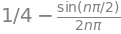

In [23]:
i2 = integrate(dprob, (x, 0, l/4))
i2.simplify()

Por lo tanto, dependiendo del valor de n la probablidad en el primer cuarto de la caja puede variar. 

### Ejercicio 11: 

Un estudiante 1D que obtuvo una nota muy mala en un control. Es tirado a un pozo de
longitud 5m como castigo y para que pueda estudiar sin distracciones. Al tratar de aprender la materia
camina de un lado a otro a velocidad constante de 1.5 m/s. ¿ En qué estado cuántico se encuentra?

Esto es obviamnete una aproximación, pero si consideramos que el cero de la energía potencial está dentro
del pozo podemos asumir que el estudiante solamente tiene energía cinética y podemos tratarlo de forma cuántica:

\begin{align}
     E_n &= \frac{n^2h^2}{8ml^2}
\end{align}

Sabemos como calular la energía cinética de una objeto macroscópico:

\begin{align}
     K &= \frac{1}{2}mv^2 
\end{align}

Por lo tanto si asumimos que el estudiante tiene una masa de 65kg, podemos estimar su estado cuántico que naturalmente será muy alto:

\begin{align}
      \frac{1}{2}mv^2 = \frac{n^2h^2}{8ml^2} \\
      n = \sqrt{\frac{8m^2v^2l^2}{2h^2}} = \sqrt{\frac{4m^2v^2l^2}{h^2}}
\end{align}

In [21]:
def n(v,m,l):
    return int(np.sqrt((4* m * v**2 * l**2)/h**2))

v = 1.5
m = 65.0
l = 5.0
ec = n(v,m,l)

print("\nEl estado cuántico del estudiante corresponde a n = {}".format(ec))


El estado cuántico del estudiante corresponde a n = 182512206322042190642434405100945408


Como pueden ver.... muuuy grande.